In [10]:
from src.data.datasets.nuscenes import NuScenesValidationMini, LABEL_ID2NAME
import tqdm

In [11]:
nusc_base_kwargs = {
    "label_names": ['car'],
    "data_root": "data/nuscenes",
    "pipeline": [],
    "box_type_3d": "Camera",
    "load_type": 'frame_based',
    "modality": dict(use_camera=True,use_lidar=False),
    "filter_empty_gt": False,
    "test_mode": False,
    "with_velocity": False,
    "use_valid_flag": False,
}

nusc_val = NuScenesValidationMini(**nusc_base_kwargs)

04/16 01:13:19 - mmengine - INFO - ------------------------------
04/16 01:13:19 - mmengine - INFO - The length of training dataset: 486
04/16 01:13:19 - mmengine - INFO - The number of instances per category in the dataset:
+----------------------+--------+
| category             | number |
+----------------------+--------+
| car                  | 2568   |
| truck                | 124    |
| trailer              | 0      |
| bus                  | 41     |
| construction_vehicle | 0      |
| bicycle              | 52     |
| motorcycle           | 259    |
| pedestrian           | 1358   |
| traffic_cone         | 39     |
| barrier              | 0      |
+----------------------+--------+
Using label names: ['car'], label ids: [0]


In [12]:
len(nusc_val)

486

In [13]:
idx = 0
nusc_val[idx].cam_instances[0]

{'bbox_label': 0,
 'bbox_label_3d': 0,
 'bbox': [989.4617350862858,
  484.11834581995345,
  1081.0958979524578,
  534.4147606681728],
 'bbox_3d_isvalid': True,
 'bbox_3d': [7.133833264177238,
  1.2869821882767871,
  42.43047478191065,
  4.734,
  1.481,
  2.001,
  -1.1730341028234474],
 'velocity': [1.6081136951709105, 5.385426796528908],
 'center_2d': [1037.2235107421875, 507.98443603515625],
 'depth': 42.43047332763672,
 'attr_label': 5,
 'patch': array([[[122, 114, 107],
         [122, 114, 107],
         [123, 115, 108],
         ...,
         [136, 135, 133],
         [138, 136, 135],
         [138, 136, 135]],
 
        [[122, 114, 107],
         [122, 114, 107],
         [123, 115, 108],
         ...,
         [136, 135, 133],
         [138, 136, 135],
         [138, 136, 135]],
 
        [[122, 114, 107],
         [122, 114, 107],
         [123, 115, 108],
         ...,
         [136, 135, 133],
         [138, 136, 135],
         [138, 136, 135]],
 
        ...,
 
        [[120,

In [14]:
num_car_instances = 0
num_instances = 0
pbar = tqdm.tqdm(total=len(nusc_val))
instance_counts = {k: 0 for k in LABEL_ID2NAME.keys()}
for sample_idx, sample in enumerate(nusc_val):
    
    for cam_instance in sample.cam_instances:
        instance_counts[cam_instance.bbox_label] += 1
        
        pbar.set_description(f"Car instances: {num_car_instances}, Total instances: {num_instances}, Current instance: {cam_instance.bbox_label}")
        num_instances += 1
        if cam_instance.bbox_label == 0:
            num_car_instances += 1
    pbar.update(1)
print(instance_counts)


Aspect ratio: 1.0000: : 2933it [00:37, 78.67it/s] 


{0: 3292, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


In [15]:
instance_counts

{0: 3292, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}

In [16]:
class AverageMeter:
    def __init__(self):
        self.reset()
        
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0
        self.history = []
        
    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
        self.history.append(val)
        
    def __str__(self):
        return f"{self.avg:.4f}"
    
    def __float__(self):
        return self.avg

In [17]:
# compute  patch size statistics - mean mode median min max
patch_size_meter_x = AverageMeter()
patch_size_meter_y = AverageMeter()

pbar = tqdm.tqdm(nusc_val)
for sample in nusc_val:
    for cam_instance in sample.cam_instances:
        patch_size_meter_x.update(cam_instance.patch.shape[1])
        patch_size_meter_y.update(cam_instance.patch.shape[0])

        pbar.set_description(f"Patch size x: {patch_size_meter_x}, Patch size y: {patch_size_meter_y}")
        pbar.update(1)
        



Car instances: 3291, Total instances: 3291, Current instance: 0: 100%|██████████| 486/486 [00:50<00:00,  9.65it/s]
Patch size x: 256.0000, Patch size y: 256.0000: : 2307it [00:26, 84.09it/s]                       

KeyboardInterrupt: 

In [ ]:
print(f"Mean patch size: {patch_size_meter_x}, {patch_size_meter_y}")
# print median, mode, min, max

import numpy as np
import scipy.stats as stats
print(f"Mean patch size x: {np.mean(patch_size_meter_x.history)}, y: {np.mean(patch_size_meter_y.history)}")
print(f"Median patch size x: {np.median(patch_size_meter_x.history)}, y: {np.median(patch_size_meter_y.history)}")
print(f"Mode patch size x: {stats.mode(patch_size_meter_x.history)}, y: {stats.mode(patch_size_meter_y.history)}")
print(f"Min patch size x: {np.min(patch_size_meter_x.history)}, y: {np.min(patch_size_meter_y.history)}")
print(f"Max patch size x: {np.max(patch_size_meter_x.history)}, y: {np.max(patch_size_meter_y.history)}")
print(f"Patch size x std: {np.std(patch_size_meter_x.history)}, y: {np.std(patch_size_meter_y.history)}")
print(f"Patch size x var: {np.var(patch_size_meter_x.history)}, y: {np.var(patch_size_meter_y.history)}")

Mean patch size: 256.0000, 256.0000
Mean patch size x: 256.0, y: 256.0
Median patch size x: 256.0, y: 256.0
Mode patch size x: ModeResult(mode=256, count=547), y: ModeResult(mode=256, count=547)
Min patch size x: 256, y: 256
Max patch size x: 256, y: 256
Patch size x std: 0.0, y: 0.0
Patch size x var: 0.0, y: 0.0


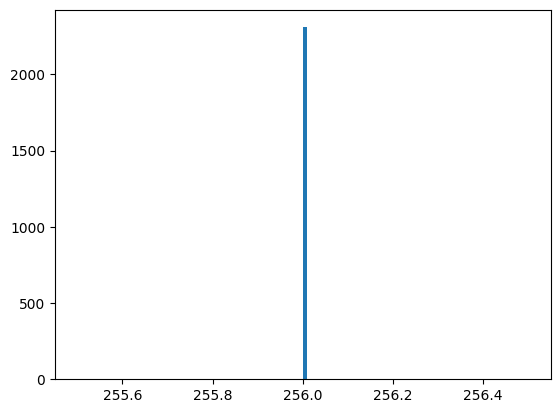

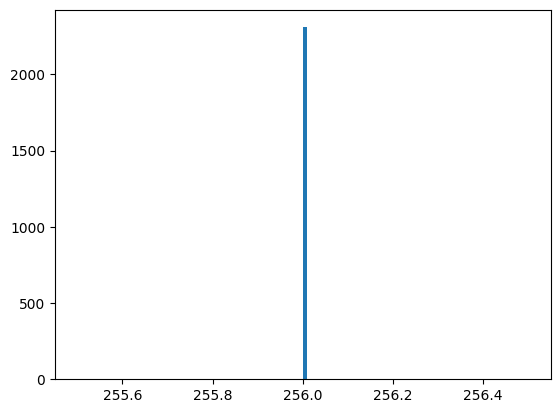

Patch size x: 256.0000, Patch size y: 256.0000: : 2308it [00:37, 84.09it/s]

In [18]:
# histogram of patch sizes
import matplotlib.pyplot as plt
plt.hist(patch_size_meter_x.history, bins=100)
plt.show()
plt.hist(patch_size_meter_y.history, bins=100)
plt.show()


In [19]:
# aspect ratio statistics
aspect_ratio_meter = AverageMeter()
pbar = tqdm.tqdm(nusc_val)
for sample in nusc_val:
    for cam_instance in sample.cam_instances:
        aspect_ratio_meter.update(cam_instance.patch.shape[1] / cam_instance.patch.shape[0])
        pbar.set_description(f"Aspect ratio: {aspect_ratio_meter}")
        pbar.update(1)
        
print(f"Mean aspect ratio: {aspect_ratio_meter}")
print(f"Median aspect ratio: {np.median(aspect_ratio_meter.history)}")
print(f"Mode aspect ratio: {stats.mode(aspect_ratio_meter.history)}")
print(f"Min aspect ratio: {np.min(aspect_ratio_meter.history)}")
print(f"Max aspect ratio: {np.max(aspect_ratio_meter.history)}")
print(f"Aspect ratio std: {np.std(aspect_ratio_meter.history)}")
print(f"Aspect ratio var: {np.var(aspect_ratio_meter.history)}")

# histogram of aspect ratios
import matplotlib.pyplot as plt
plt.hist(aspect_ratio_meter.history, bins=100)
plt.show()


Patch size x: 256.0000, Patch size y: 256.0000: : 2308it [00:37, 62.02it/s]


KeyboardInterrupt: 

In [ ]:
# histogram of patch sizes
import matplotlib.pyplot as plt
plt.hist(patch_size_meter_x.history, bins=100)
plt.show()
plt.hist(patch_size_meter_y.history, bins=100)

plt.show()

Aspect ratio: 1.0000: : 761it [00:19, 38.78it/s]
Sample 0, Camera 0, Label: 0, Patch shape: (256, 256, 3):   0%|          | 0/486 [00:00<?, ?it/s]

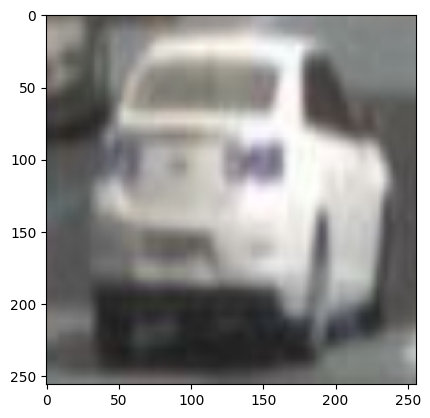

Sample 0, Camera 1, Label: 0, Patch shape: (256, 256, 3):   0%|          | 0/486 [00:00<?, ?it/s]

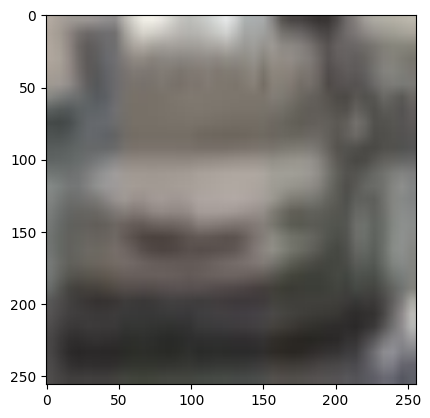

Sample 3, Camera 0, Label: 0, Patch shape: (256, 256, 3):   0%|          | 1/486 [00:00<03:36,  2.24it/s]

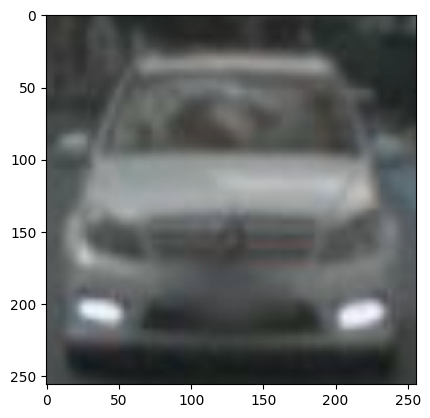

Sample 3, Camera 1, Label: 0, Patch shape: (256, 256, 3):   0%|          | 1/486 [00:00<03:36,  2.24it/s]

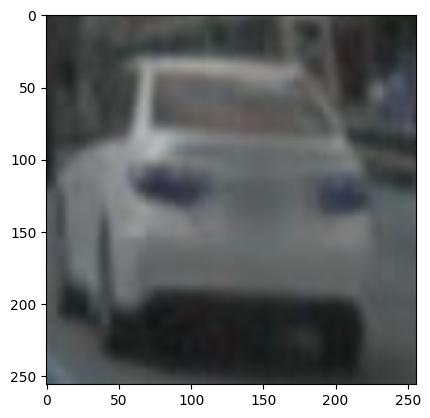

Sample 6, Camera 0, Label: 0, Patch shape: (256, 256, 3):   1%|          | 4/486 [00:00<01:40,  4.79it/s]

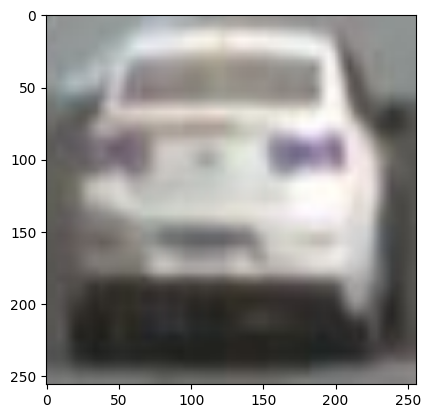

Sample 6, Camera 1, Label: 0, Patch shape: (256, 256, 3):   1%|          | 4/486 [00:01<01:40,  4.79it/s]

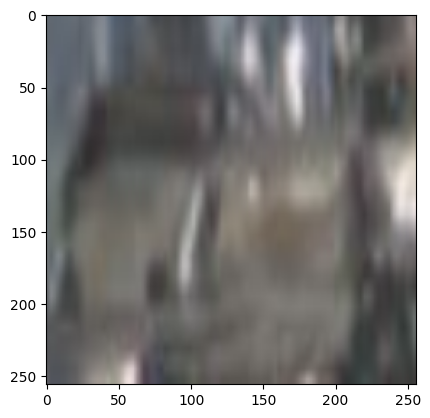

Sample 6, Camera 2, Label: 0, Patch shape: (256, 256, 3):   1%|          | 4/486 [00:01<01:40,  4.79it/s]

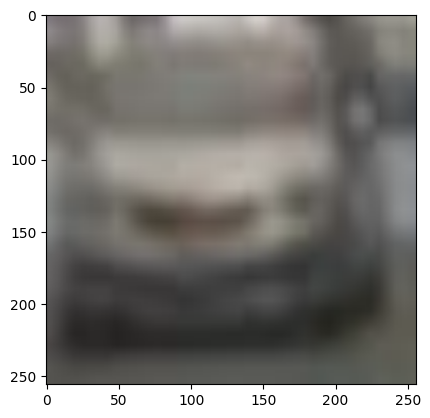

Sample 6, Camera 3, Label: 0, Patch shape: (256, 256, 3):   1%|          | 4/486 [00:01<01:40,  4.79it/s]

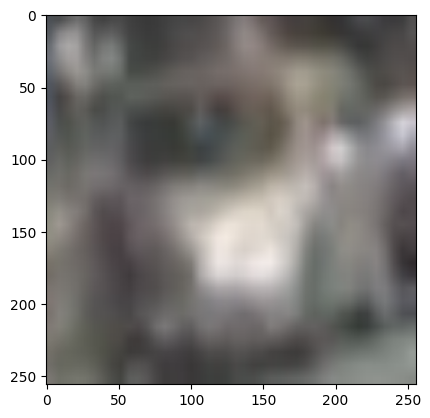

Sample 6, Camera 4, Label: 0, Patch shape: (256, 256, 3):   1%|          | 4/486 [00:01<01:40,  4.79it/s]

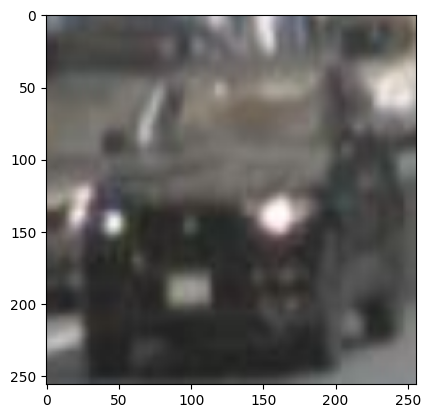

Sample 9, Camera 0, Label: 0, Patch shape: (256, 256, 3):   2%|▏         | 9/486 [00:02<01:32,  5.13it/s]

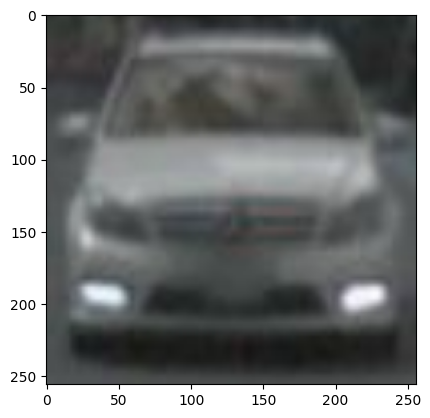

Sample 12, Camera 0, Label: 0, Patch shape: (256, 256, 3):   2%|▏         | 11/486 [00:02<01:19,  5.95it/s]

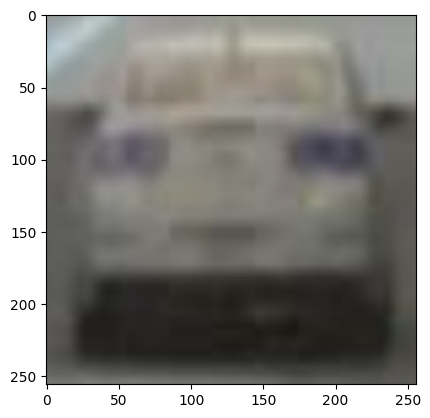

Sample 15, Camera 0, Label: 0, Patch shape: (256, 256, 3):   3%|▎         | 15/486 [00:02<00:58,  7.99it/s]

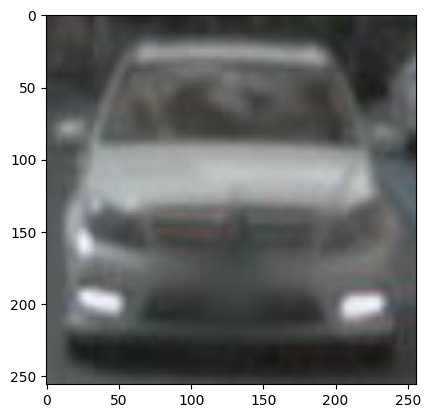

Sample 18, Camera 0, Label: 0, Patch shape: (256, 256, 3):   3%|▎         | 17/486 [00:03<01:20,  5.83it/s]

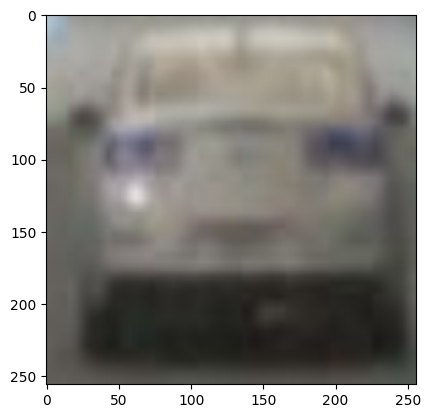

Sample 21, Camera 0, Label: 0, Patch shape: (256, 256, 3):   4%|▍         | 19/486 [00:03<01:12,  6.44it/s]

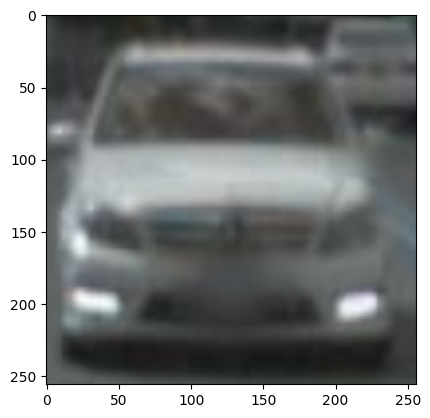

Sample 24, Camera 0, Label: 0, Patch shape: (256, 256, 3):   5%|▍         | 22/486 [00:03<00:58,  7.90it/s]

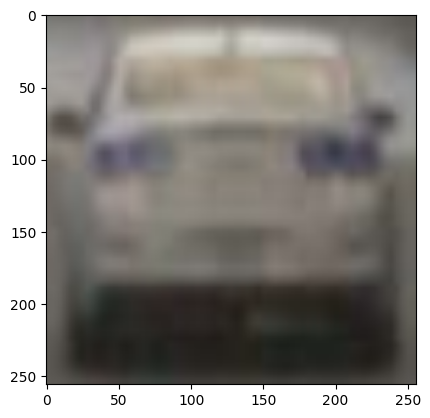

Sample 27, Camera 0, Label: 0, Patch shape: (256, 256, 3):   5%|▌         | 25/486 [00:03<00:51,  8.94it/s]

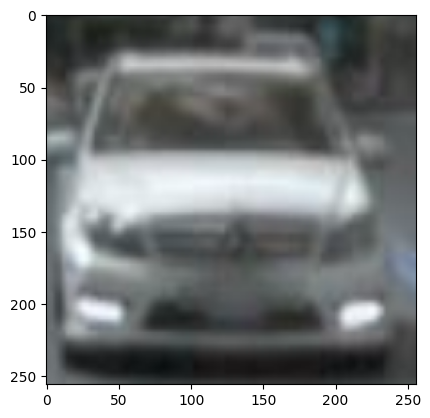

Sample 30, Camera 0, Label: 0, Patch shape: (256, 256, 3):   6%|▌         | 28/486 [00:04<00:46,  9.82it/s]

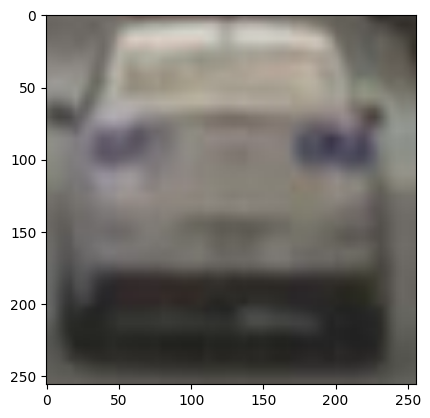

Sample 32, Camera 0, Label: 0, Patch shape: (256, 256, 3):   6%|▋         | 31/486 [00:04<00:45, 10.02it/s]

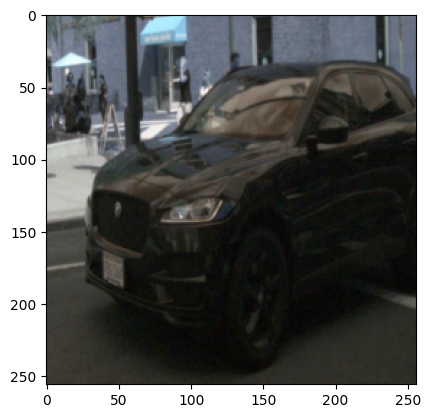

Sample 33, Camera 0, Label: 0, Patch shape: (256, 256, 3):   7%|▋         | 33/486 [00:04<00:49,  9.12it/s]

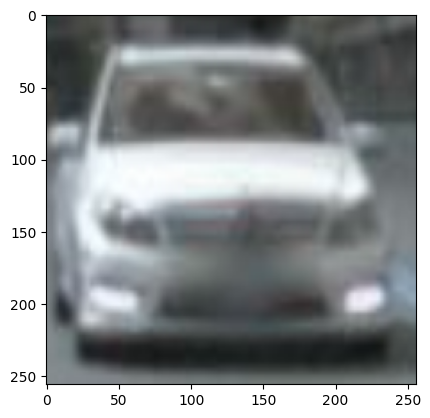

Sample 36, Camera 0, Label: 0, Patch shape: (256, 256, 3):   7%|▋         | 34/486 [00:04<00:56,  8.04it/s]

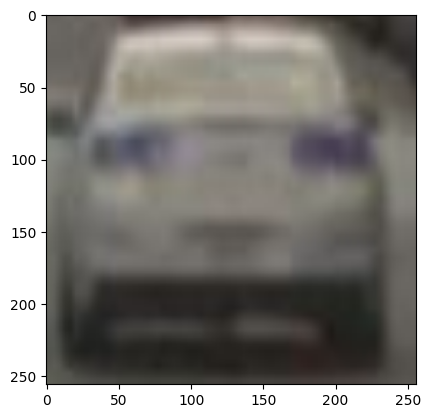

Sample 39, Camera 0, Label: 0, Patch shape: (256, 256, 3):   8%|▊         | 37/486 [00:05<00:49,  9.10it/s]

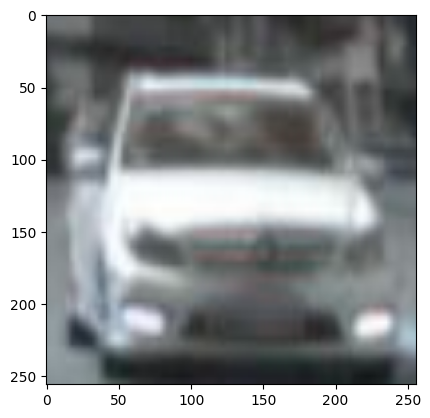

Sample 40, Camera 0, Label: 0, Patch shape: (256, 256, 3):   8%|▊         | 40/486 [00:05<00:45,  9.71it/s]

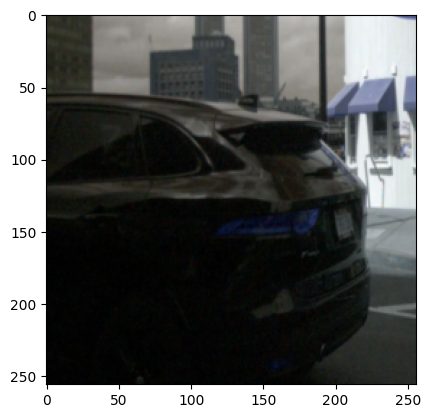

Sample 42, Camera 0, Label: 0, Patch shape: (256, 256, 3):   8%|▊         | 41/486 [00:05<00:56,  7.81it/s]

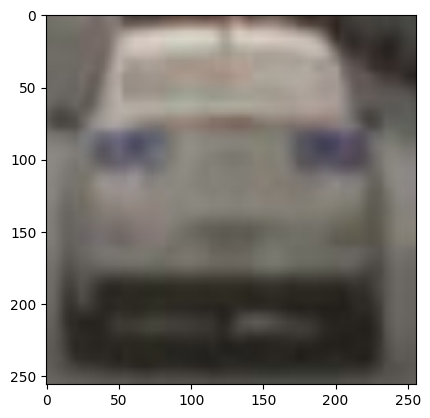

Sample 43, Camera 0, Label: 0, Patch shape: (256, 256, 3):   9%|▉         | 43/486 [00:06<00:56,  7.82it/s]

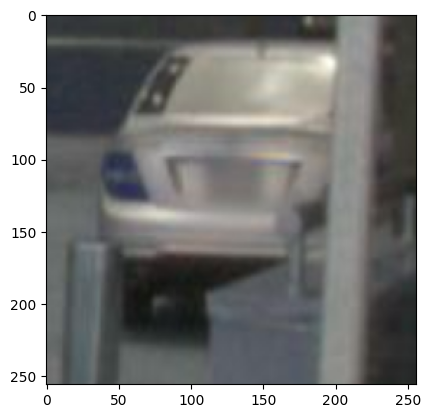

Sample 44, Camera 0, Label: 0, Patch shape: (256, 256, 3):   9%|▉         | 44/486 [00:06<01:04,  6.87it/s]

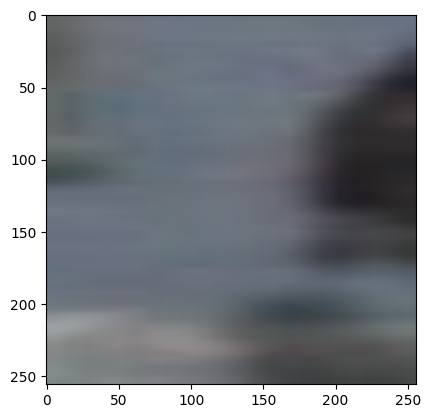

Sample 45, Camera 0, Label: 0, Patch shape: (256, 256, 3):   9%|▉         | 45/486 [00:06<01:06,  6.60it/s]

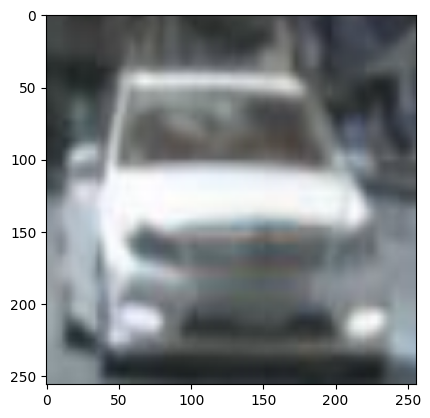

Sample 47, Camera 0, Label: 0, Patch shape: (256, 256, 3):   9%|▉         | 46/486 [00:06<01:13,  6.02it/s]

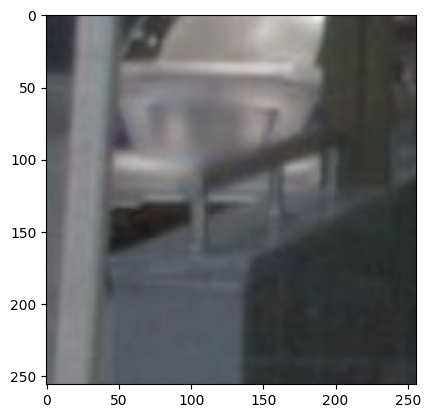

Sample 48, Camera 0, Label: 0, Patch shape: (256, 256, 3):  10%|▉         | 48/486 [00:06<01:06,  6.60it/s]

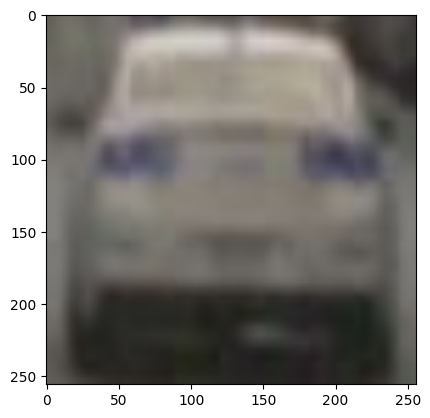

Sample 48, Camera 0, Label: 0, Patch shape: (256, 256, 3):  10%|█         | 50/486 [00:07<01:02,  6.99it/s]


KeyboardInterrupt: 

In [20]:
# display 10 samples in the original size
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

pbar = tqdm.tqdm(nusc_val)
counter = 0
for i, sample in enumerate(pbar):
    for cam_instance_idx, cam_instance in enumerate(sample.cam_instances):
        pbar.set_description(f"Sample {i}, Camera {cam_instance_idx}, Label: {cam_instance.bbox_label}, Patch shape: {cam_instance.patch.shape}")
        if cam_instance.bbox_label == 0:
            plt.imshow(cam_instance.patch)
            plt.show()
            counter += 1
        if counter >= 10:
            break
        
